In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = np.linspace(0.01, 1000, num=100000)

## a)

In [3]:
def get_variance(data):
    sum = np.sum(data)
    mean = sum / len(data)
    variance = np.sum((data - mean) ** 2) / len(data)
    return variance

In [4]:
variance = get_variance(data)

In [5]:
print("True Variance of the Population D is", variance)

True Variance of the Population D is 83333.33332500001


## b)

In [6]:
def s1_squared(sampled_data):
    sum = np.sum(sampled_data)
    mean = sum / len(sampled_data)
    numerator = np.sum((sampled_data - mean) ** 2)
    denominator = len(sampled_data) + 1
    return numerator / denominator

def s2_squared(sampled_data):
    sum = np.sum(sampled_data)
    mean = sum / len(sampled_data)
    numerator = np.sum((sampled_data - mean) ** 2)
    denominator = len(sampled_data)
    return numerator / denominator

def s3_squared(sampled_data):
    sum = np.sum(sampled_data)
    mean = sum / len(sampled_data)
    numerator = np.sum((sampled_data - mean) ** 2)
    denominator = len(sampled_data) - 1
    return numerator / denominator

In [7]:
# sample 50 times with replacement
def sample_with_replacement(data, sample_size):
    sample = []
    for i in range(sample_size):
        sample.append(np.random.choice(data))
    return sample

In [8]:
np.random.seed(31)
sample_with_replacement_50 = sample_with_replacement(data, 50)

In [9]:
s1_squared_val = s1_squared(sample_with_replacement_50)
s2_squared_val = s2_squared(sample_with_replacement_50)
s3_squared_val = s3_squared(sample_with_replacement_50)

In [10]:
print("s1_squared is", s1_squared_val)
print("s2_squared is", s2_squared_val)
print("s3_squared is", s3_squared_val)

s1_squared is 80874.38115454903
s2_squared is 82491.86877764002
s3_squared is 84175.3763037143


## c)

In [11]:
def mean(data):
    sum = np.sum(data)
    mean = sum / len(data)
    return mean

def simulate(num_runs):
    avg_s1_squared = []
    avg_s2_squared = []
    avg_s3_squared = []
    s1_squared_res = []
    s2_squared_res = []
    s3_squared_res = []
    for i in range(num_runs):
        sample_with_replacement_50 = sample_with_replacement(data, 50)
        s1_squared_res.append(s1_squared(sample_with_replacement_50))
        s2_squared_res.append(s2_squared(sample_with_replacement_50))
        s3_squared_res.append(s3_squared(sample_with_replacement_50))
        avg_s1_squared.append(mean(s1_squared_res))
        avg_s2_squared.append(mean(s2_squared_res))
        avg_s3_squared.append(mean(s3_squared_res))
    return avg_s1_squared, avg_s2_squared, avg_s3_squared

In [12]:
avg_s1_squared_1000_runs, avg_s2_squared_1000_runs, avg_s3_squared_1000_runs = simulate(1000)

## d)

Scatter Plots of Avg Results

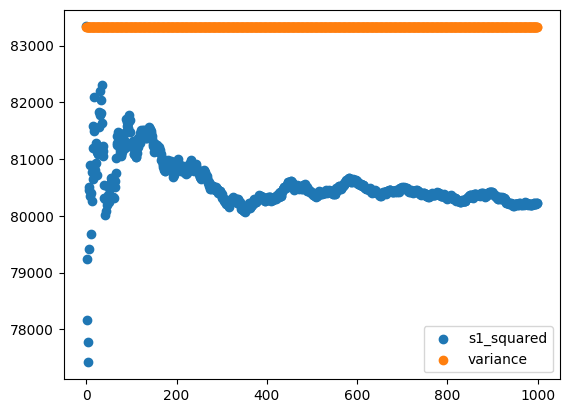

In [13]:
plt.scatter(range(1000), avg_s1_squared_1000_runs, label="s1_squared")
plt.scatter(range(1000), [variance]*1000, label="variance")
plt.legend()
plt.show()

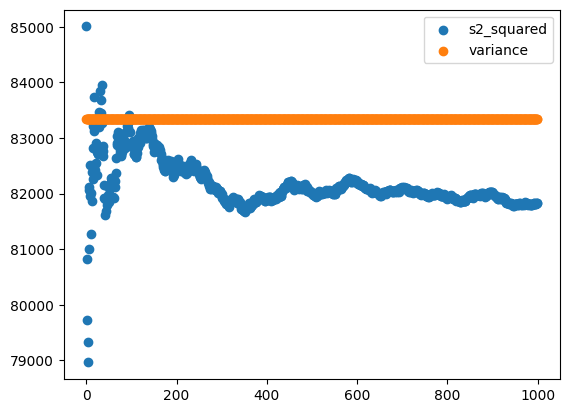

In [14]:
plt.scatter(range(1000), avg_s2_squared_1000_runs, label="s2_squared")
plt.scatter(range(1000), [variance]*1000, label="variance")
plt.legend()
plt.show()

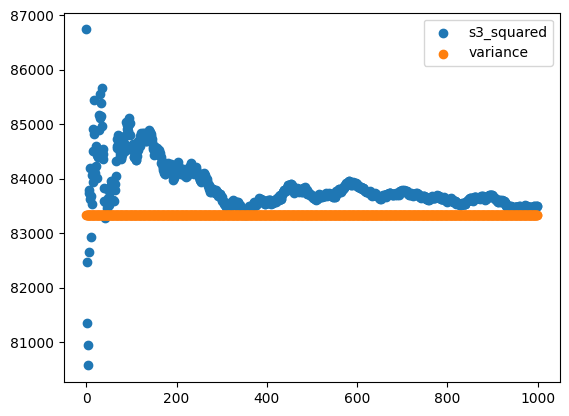

In [15]:
plt.scatter(range(1000), avg_s3_squared_1000_runs, label="s3_squared")
plt.scatter(range(1000), [variance]*1000, label="variance")
plt.legend()
plt.show()

## e)

In [16]:
def simulate_avg_si(num_runs, num_sub_runs):
    avg_s1_squared = []
    avg_s2_squared = []
    avg_s3_squared = []
    for i in range(num_runs):
        avg_s1_squared_sub_runs, avg_s2_squared_sub_runs, avg_s3_squared_sub_runs = simulate(num_sub_runs)
        avg_s1_squared.append(avg_s1_squared_sub_runs)
        avg_s2_squared.append(avg_s2_squared_sub_runs)
        avg_s3_squared.append(avg_s3_squared_sub_runs)
    return avg_s1_squared, avg_s2_squared, avg_s3_squared

In [18]:
avg_s1_squared_10_runs_1000_sub_runs, avg_s2_squared_10_runs_1000_sub_runs, avg_s3_squared_10_runs_1000_sub_runs = simulate_avg_si(10, 1000)

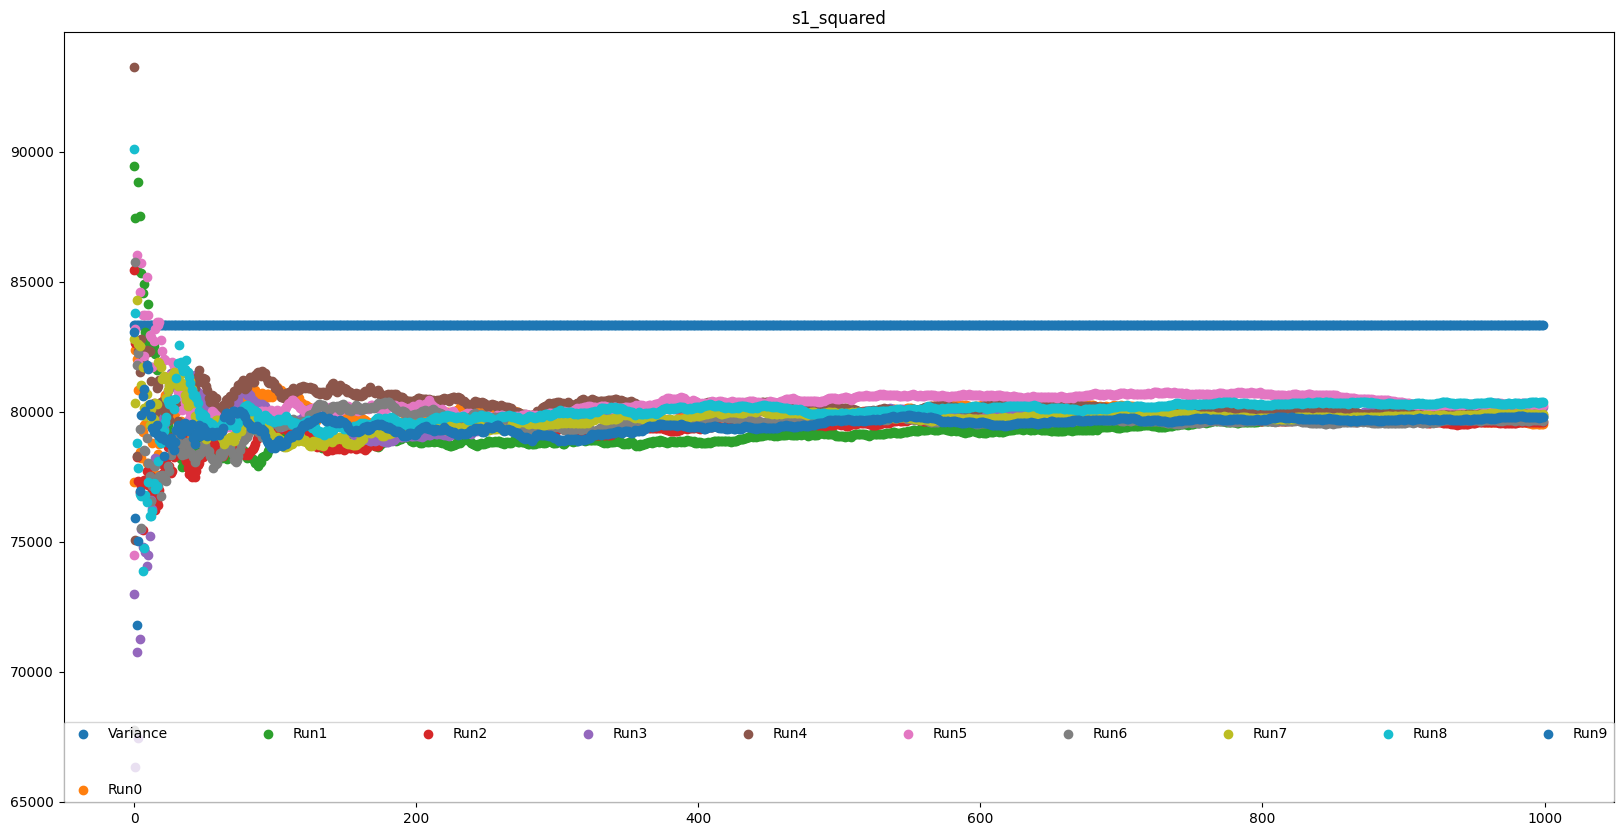

In [30]:
plt.scatter(range(1000), [variance]*1000, label="Variance")
for i in range(10):
    plt.scatter(range(1000), avg_s1_squared_10_runs_1000_sub_runs[i], label="Run" + str(i))
plt.legend()
#increase figure size
plt.rcParams["figure.figsize"] = (20,10)
# make linear legend on top
plt.legend(loc='lower left',
                ncol=10, mode="expand", borderaxespad=0.)
plt.title("s1_squared")
plt.show()

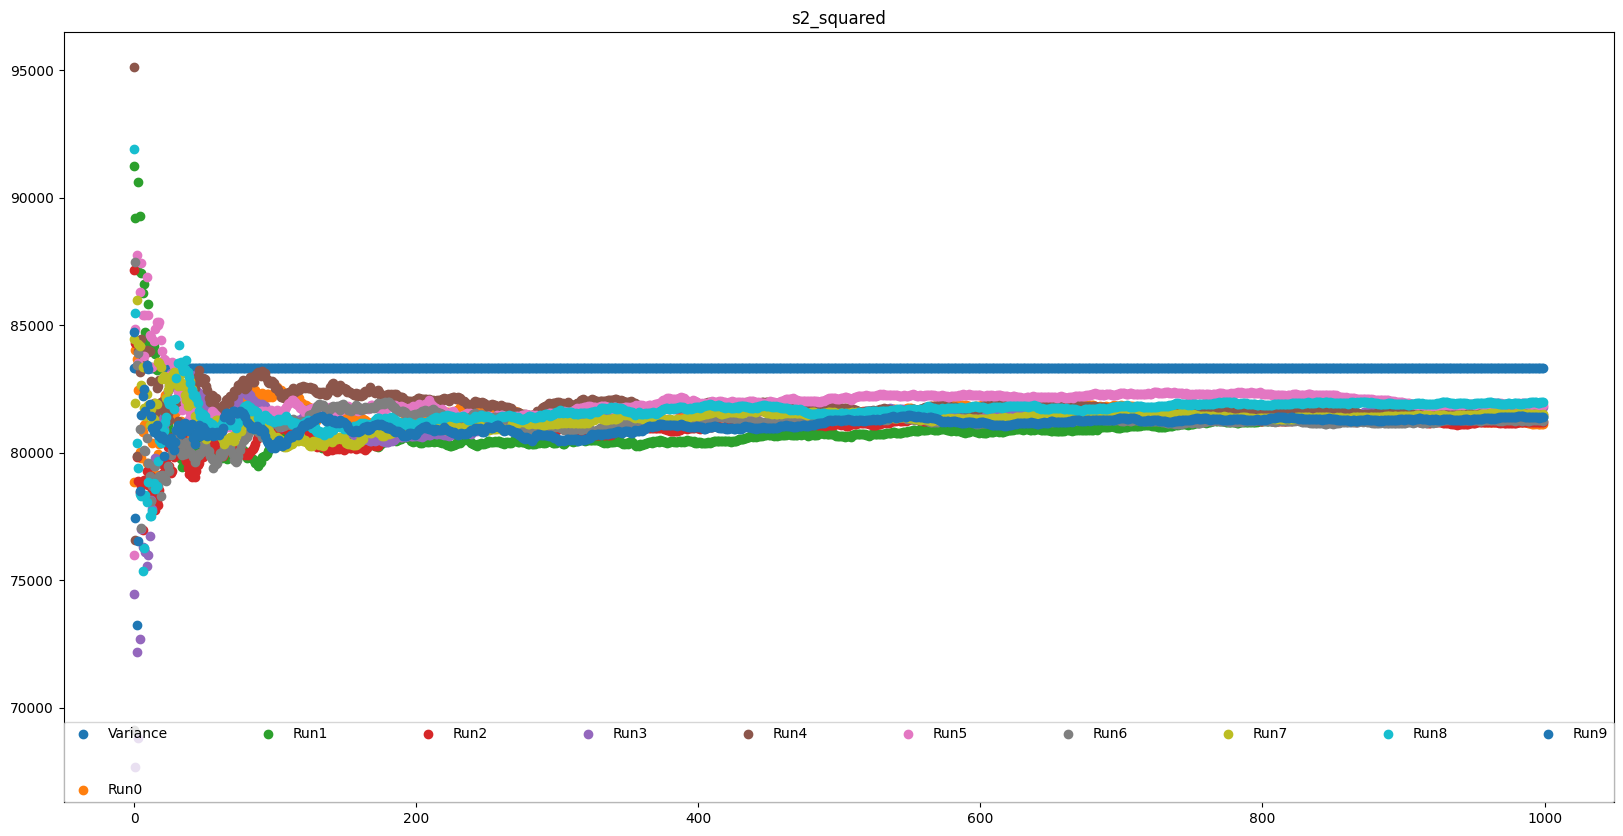

In [29]:
plt.scatter(range(1000), [variance]*1000, label="Variance")
for i in range(10):
    plt.scatter(range(1000), avg_s2_squared_10_runs_1000_sub_runs[i], label="Run" + str(i))
plt.legend()
#increase figure size
plt.rcParams["figure.figsize"] = (20,10)
# make linear legend on top
plt.legend(loc='lower left',
                ncol=10, mode="expand", borderaxespad=0.)
plt.title("s2_squared")
plt.show()

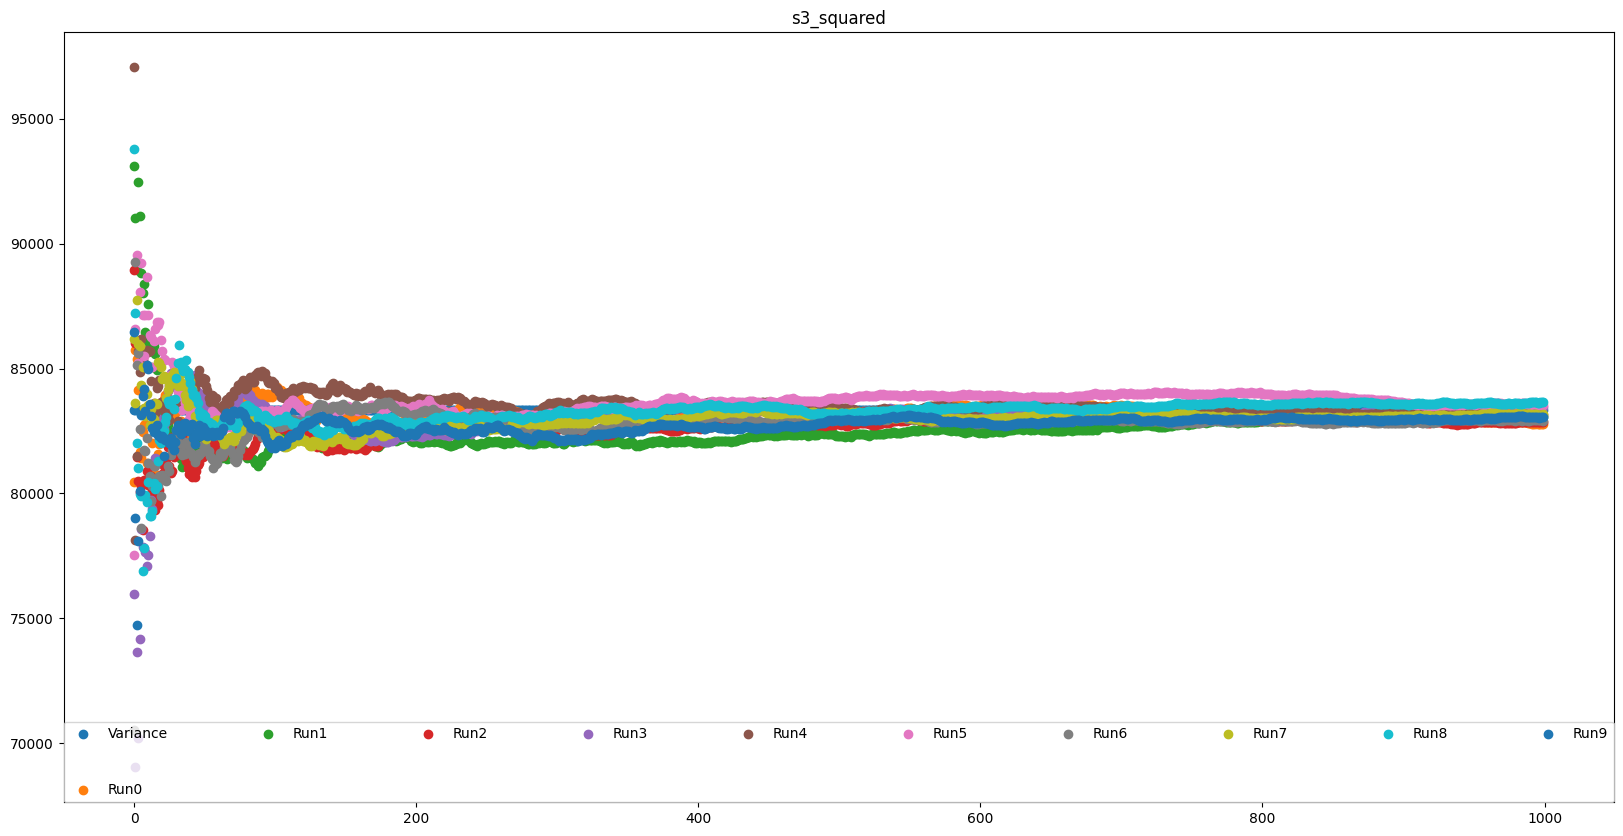

In [31]:
plt.scatter(range(1000), [variance]*1000, label="Variance")
for i in range(10):
    plt.scatter(range(1000), avg_s3_squared_10_runs_1000_sub_runs[i], label="Run" + str(i))
plt.legend()
#increase figure size
plt.rcParams["figure.figsize"] = (20,10)
# make linear legend on top
plt.legend(loc='lower left',
                ncol=10, mode="expand", borderaxespad=0.)
plt.title("s3_squared")
plt.show()

As is evident from the plots s3 is most close to the true variance. This is because it has the formula for s3 is the formula for unbiased estimation of sample variance - 

This adjustment is necessary to account for the bias that would otherwise be introduced if you used "n" (the number of data points) in the denominator.

The key idea behind this correction is to make the sample variance an unbiased estimator of the population variance. In statistics, an estimator is considered unbiased if, on average, it yields the true value of the parameter being estimated. In this case, we want the sample variance to, on average, provide an accurate estimate of the population variance.

When you calculate the sample variance using "n-1" in the denominator, you are essentially dividing by the degrees of freedom of the sample. Degrees of freedom are related to the idea that when you estimate one parameter (the sample mean) from the data, you lose one degree of freedom. By using "n-1" instead of "n," you correct for this loss of one degree of freedom and make the sample variance an unbiased estimator of the population variance.